<a href="https://colab.research.google.com/github/mkayanda/Blood_cell_images/blob/main/project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Health Analytics (HS 628) - Summer Semester 2020 Final Project

---

**Blood Cell Images**


The diagnosis of blood-based diseases often involves identifying and characterizing patient blood samples. Automated methods to detect and classify blood cell subtypes have important medical applications.

Content


---


This dataset contains 12,500 augmented images of blood cells (JPEG) with accompanying cell type labels (CSV). There are approximately 3,000 images for each of 4 different cell types grouped into 4 different folders (according to cell type). The cell types are Eosinophil, Lymphocyte, Monocyte, and Neutrophil. This dataset is accompanied by an additional dataset containing the original 410 images (pre-augmentation) as well as two additional subtype labels (WBC vs WBC) and also bounding boxes for each cell in each of these 410 images (JPEG + XML metadata). More specifically, the folder 'dataset-master' contains 410 images of blood cells with subtype labels and bounding boxes (JPEG + XML), while the folder 'dataset2-master' contains 2,500 augmented images as well as 4 additional subtype labels (JPEG + CSV). There are approximately 3,000 augmented images for each class of the 4 classes as compared to 88, 33, 21, and 207 images of each in folder 'dataset-master'.



---


The diagnosis of blood-based diseases often involves identifying and characterizing patient blood samples.
Automated methods to detect and classify blood cell subtypes have important medical applications.


---


# Presented by  Moses Kayanda
---



---




#Reading the data from Kaggle







In [ ]:
 ! pip install -q kaggle
 ! ls

blood-cells.zip  dataset-master  kaggle.json  sample_data
dataset2-master  drive		 model.h5


In [ ]:
 from google.colab import files

files.upload()

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#! kaggle datasets list 

In [ ]:
#Searching the dataset in Kaggle
!kaggle datasets list -s blood-cell

ref                                                          title                                               size  lastUpdated          downloadCount  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
paultimothymooney/blood-cells                                Blood Cell Images                                  108MB  2018-04-21 21:06:13          15368  
mkachuee/BloodPressureDataset                                Cuff-Less Blood Pressure Estimation                  5GB  2017-06-03 23:47:04           2823  
mansoordaku/ckdisease                                        Chronic KIdney Disease dataset                      10KB  2017-04-13 09:16:08           7037  
kmader/malaria-bounding-boxes                                Malaria Bounding Boxes                               4GB  2019-05-09 13:37:54           1717  
rsingh99/blood-cell                                          Blo

In [ ]:
!kaggle datasets download -d paultimothymooney/blood-cells -p /content


 83% 90.0M/108M [00:03<00:00, 21.1MB/s]
100% 108M/108M [00:03<00:00, 36.3MB/s] 


In [ ]:
#unzip dataset 
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8864.jpeg  
  inflating: dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_9_8931.jpeg  
  inflating: dataset2-mast

### Loading necessary Libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import os
from matplotlib.image import imread
import seaborn as sns
import pandas as pd
import numpy as np

### Data Preprocessing

In [ ]:
data_dir = '/content/dataset2-master/dataset2-master/images/'

In [ ]:
os.listdir(data_dir)

['TRAIN', 'TEST', 'TEST_SIMPLE']

In [ ]:
 # We will visualize the images in each folder and check the size of each folder. 

In [ ]:
test_path = "/content/dataset2-master/dataset2-master/images/TEST"
train_path = "/content/dataset2-master/dataset2-master/images/TRAIN"

In [ ]:
os.listdir(test_path)

['MONOCYTE', 'LYMPHOCYTE', 'EOSINOPHIL', 'NEUTROPHIL']

In [ ]:
os.listdir('/content/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE')[0]


'_0_9112.jpeg'

In [ ]:
monocyte_1 = cv2.imread('/content/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_11_1041.jpeg')
monocyte_1 = cv2.cvtColor(monocyte_1,cv2.COLOR_BGR2RGB)

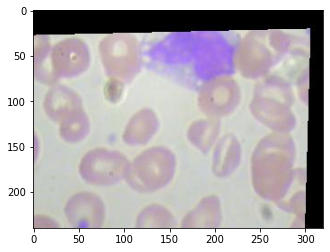

In [ ]:
plt.imshow(monocyte_1)

In [ ]:
monocyte_1.shape

(240, 320, 3)

In [ ]:
os.listdir('/content/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL')[0]

'_30_7450.jpeg'

In [ ]:
neutrophil_1 = cv2.imread('/content/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL/_117_8374.jpeg')
neutrophil_1 = cv2.cvtColor(neutrophil_1,cv2.COLOR_BGR2RGB)

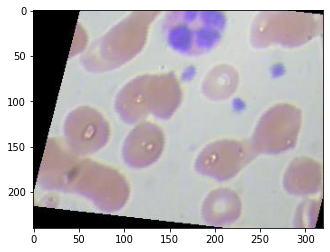

In [ ]:
plt.imshow(neutrophil_1)

In [ ]:
neutrophil_1.shape

(240, 320, 3)

In [ ]:
os.listdir('/content/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL')[0]

'_70_5942.jpeg'

In [ ]:
eosinophil_1 = cv2.imread('/content/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_64_1816.jpeg')
eosinophil_1 = cv2.cvtColor(eosinophil_1,cv2.COLOR_BGR2RGB)

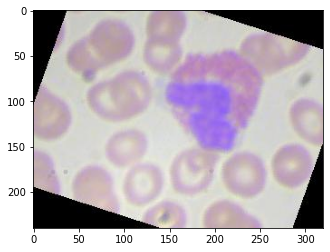

In [ ]:
plt.imshow(eosinophil_1)

In [ ]:
eosinophil_1.shape

(240, 320, 3)

In [ ]:
os.listdir("/content/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE")[0]

'_22_855.jpeg'

In [ ]:
lymphocyte_1 = cv2.imread('/content/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_25_9994.jpeg')
lymphocyte_1 = cv2.cvtColor(lymphocyte_1,cv2.COLOR_BGR2RGB)

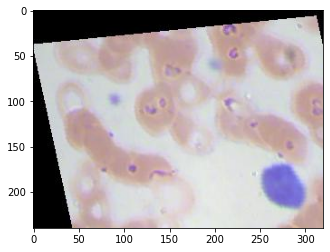

In [ ]:
plt.imshow(lymphocyte_1)

In [ ]:
lymphocyte_1.shape

(240, 320, 3)

Checking how many images there are in each category. 

In [ ]:
len(os.listdir("/content/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL"))

2497

In [ ]:
len(os.listdir("/content/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE"))

2483

In [ ]:
len(os.listdir("/content/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE"))

2478

In [ ]:
len(os.listdir("/content/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL"))

2499

In [ ]:
len(os.listdir("/content/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL"))

623

In [ ]:
len(os.listdir("/content/dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE"))

620

In [ ]:
len(os.listdir("/content/dataset2-master/dataset2-master/images/TEST/MONOCYTE"))

620

In [ ]:
len(os.listdir("/content/dataset2-master/dataset2-master/images/TEST/NEUTROPHIL"))

624

In [ ]:
# the dataset doesnt look almost perfectly balanced each corresponding in train and test folders. 
#We will therefore be checking for accuracy as a performance metric

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.1, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

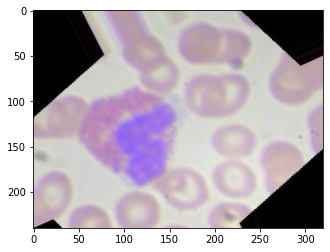

In [ ]:
plt.imshow(image_gen.random_transform(eosinophil_1))

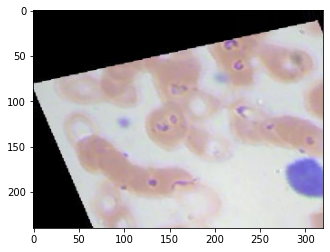

In [ ]:
plt.imshow(image_gen.random_transform(lymphocyte_1))

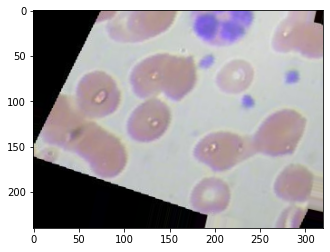

In [ ]:
plt.imshow(image_gen.random_transform(neutrophil_1))

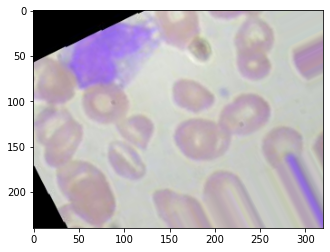

In [ ]:
plt.imshow(image_gen.random_transform(monocyte_1))

### Generating many manipulated images from a directory

In [ ]:
image_gen.flow_from_directory(train_path)

Found 9957 images belonging to 4 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2487 images belonging to 4 classes.


In [ ]:
# since all images have the same shape we will use below shape
image_shape = (224,224,3)

# Creating the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, padding = 'same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(512, activation='relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 53, 53, 64)        36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 24, 24, 128)      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# Train the Model

In [ ]:
batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 9957 images belonging to 4 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 2487 images belonging to 4 classes.


In [ ]:
train_image_gen.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             validation_steps=12,
                              callbacks = [early_stop])

Epoch 1/20
623/623 [==============================] - 35s 56ms/step - loss: 0.9900 - accuracy: 0.5503 - val_loss: 0.6577 - val_accuracy: 0.6094
Epoch 2/20
623/623 [==============================] - 35s 55ms/step - loss: 0.4309 - accuracy: 0.8363 - val_loss: 0.3056 - val_accuracy: 0.8802
Epoch 3/20
623/623 [==============================] - 35s 56ms/step - loss: 0.2806 - accuracy: 0.8931 - val_loss: 0.2033 - val_accuracy: 0.8698
Epoch 4/20
623/623 [==============================] - 35s 56ms/step - loss: 0.2921 - accuracy: 0.9216 - val_loss: 0.1936 - val_accuracy: 0.8698
Epoch 5/20
623/623 [==============================] - 35s 56ms/step - loss: 0.2516 - accuracy: 0.9324 - val_loss: 0.1762 - val_accuracy: 0.8854
Epoch 6/20
623/623 [==============================] - 35s 55ms/step - loss: 0.2462 - accuracy: 0.9402 - val_loss: 0.1638 - val_accuracy: 0.8698
Epoch 7/20
623/623 [==============================] - 34s 55ms/step - loss: 0.2080 - accuracy: 0.9440 - val_loss: 0.2943 - val_accuracy:

In [ ]:
#save model 


In [ ]:
model.history.history

{'accuracy': [0.24746409058570862, 0.25077834725379944, 0.25087878108024597],
 'loss': [1.4047818183898926, 1.3873940706253052, 1.3916467428207397],
 'val_accuracy': [0.4055989682674408, 0.4055989682674408, 0.4055989682674408],
 'val_loss': [1.3862943649291992, 1.3862943649291992, 1.3862943649291992]}

# Evaluating the Model

In [ ]:
accuracy = pd.DataFrame(model.history.history)

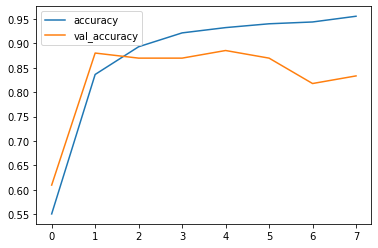

In [ ]:
accuracy[['accuracy','val_accuracy']].plot()

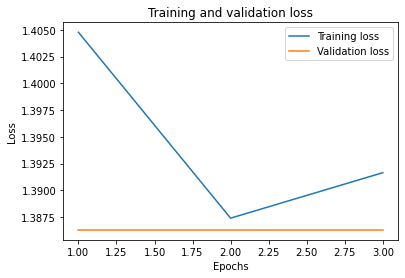

In [ ]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate_generator(test_image_gen)

[0.6690468192100525, 0.8464012742042542]

# Predicting on new images


In [ ]:
train_image_gen.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img1 = '/content/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_0_2370.jpeg'

In [ ]:
my_image = image.load_img(img1,target_size=image_shape)

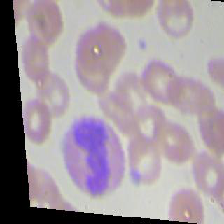

In [ ]:
my_image

In [ ]:
type(my_image)

PIL.Image.Image

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
type(my_image)

numpy.ndarray

In [ ]:
my_image.shape

(224, 224, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

(1, 224, 224, 3)

In [ ]:
model.predict(my_image)

array([[1., 1., 1., 1.]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3}

In [ ]:
#We will now try Transfer learning

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
image_gen

In [ ]:
batch_size = 32

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [ ]:
image_shape = (224,224,3)

My pretrained model of choice is VGG16, I add a new top layer consisting of a large-ish fully connected layer with moderate regularization in the form of dropout. There are 4 output classes, so the output layer has 4 nodes.

In [ ]:
new_model = keras.applications.VGG16(
    include_top=False, 
    weights='imagenet',
    input_shape=(224, 224, 3)
)
model = Sequential()
model.add(new_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid', name='Output'))


In [ ]:
# Freeze the VGG16 model, e.g. do not train any of its weights. We will just use it as-is.
for cnn_block_layer in model.layers[0].layers:
    cnn_block_layer.trainable = False
model.layers[0].trainable = False

In [ ]:
# Compile the model. RMSprop with the default learning weight worked best.
model.compile(
    optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#fiting the model 
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             validation_steps=12,
                              callbacks = [early_stop])

Epoch 1/20
78/78 [==============================] - 79s 1s/step - loss: 1.4048 - accuracy: 0.2475 - val_loss: 1.3863 - val_accuracy: 0.4056
Epoch 2/20
78/78 [==============================] - 79s 1s/step - loss: 1.3874 - accuracy: 0.2508 - val_loss: 1.3863 - val_accuracy: 0.4056
Epoch 3/20
78/78 [==============================] - 79s 1s/step - loss: 1.3916 - accuracy: 0.2509 - val_loss: 1.3863 - val_accuracy: 0.4056


Our trained model, performed better than the pretrained model from VGG16. We will therefore go ahead with our model. 